In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')

In [216]:
df = pd.read_csv("bmw.csv")
df['year'] = df['year'].astype('str')
display(df.head())
display(df.info())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  object 
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 758.2+ KB


None

In [217]:
def unique_val(dataframe, col):

    data = pd.DataFrame(dataframe[col].value_counts())
    data = data.reset_index()
    data = data.rename(columns={col:'no of cars', 'index':col})
    data['% of cars'] = np.round(data['no of cars']/data['no of cars'].sum(), 4)*100
    data = data.sort_values('% of cars', ascending=False)
    display(data.head())
    
    return data

In [218]:
def annotate_bars(splot):
    for p in splot.patches:
        splot.annotate(format(round(p.get_height()), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -12), 
                       textcoords = 'offset points')

In [219]:
transmission = unique_val(df, 'transmission')
model = unique_val(df, 'model')
fuelType = unique_val(df, 'fuelType')

,transmission,no of cars,% of cars
0,Semi-Auto,4666,43.28
1,Automatic,3588,33.28
2,Manual,2527,23.44


,model,no of cars,% of cars
0,3 Series,2443,22.66
1,1 Series,1969,18.26
2,2 Series,1229,11.40
3,5 Series,1056,9.80
4,4 Series,995,9.23


,fuelType,no of cars,% of cars
0,Diesel,7027,65.18
1,Petrol,3417,31.69
2,Hybrid,298,2.76
3,Other,36,0.33
4,Electric,3,0.03


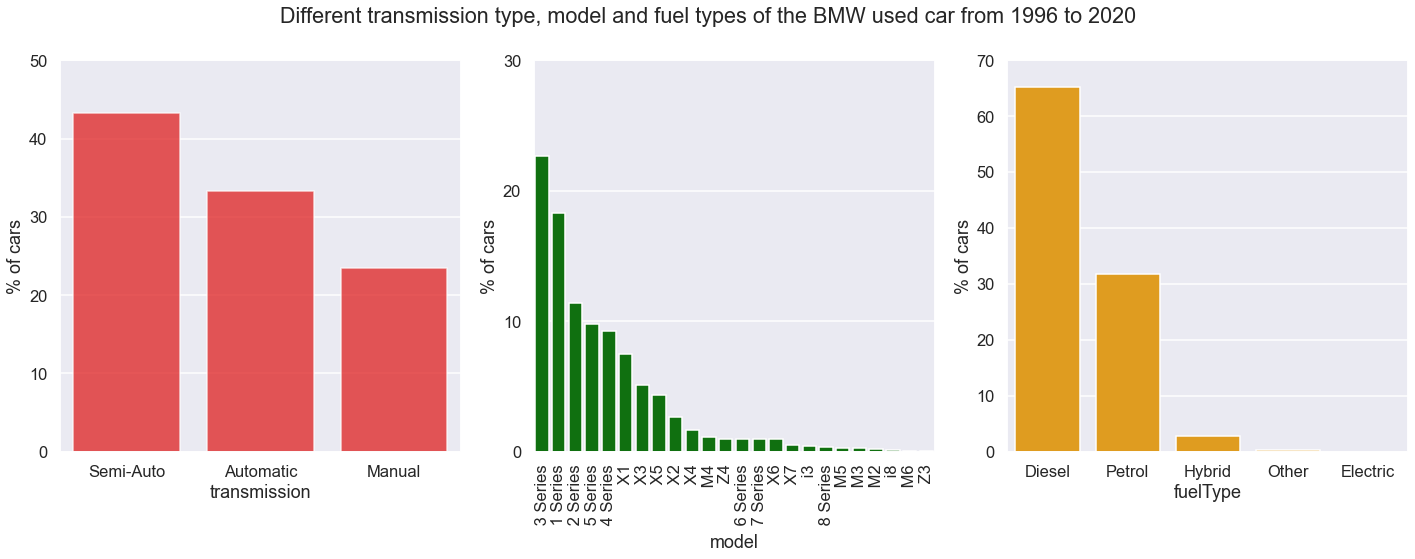

In [220]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
_ = sns.barplot(x='transmission', y='% of cars', data=transmission, color='red', alpha=0.75)
plt.yticks(np.arange(0, transmission['% of cars'].max()+10, 10).tolist())
# annotate_bars(_)

plt.subplot(1,3,2)
_ = sns.barplot(x='model', y='% of cars', data=model, color='green')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, model['% of cars'].max()+10, 10).tolist())
# annotate_bars(_)

plt.subplot(1,3,3)
_ = sns.barplot(x='fuelType', y='% of cars', data=fuelType, color='orange')
# annotate_bars(_)
plt.yticks(np.arange(0, fuelType['% of cars'].max()+10, 10).tolist())

plt.suptitle("Different transmission type, model and fuel types of the BMW used car from 1996 to 2020")
plt.tight_layout()
plt.show()

In [221]:
year = pd.DataFrame(df['year'].value_counts())
year = year.reset_index()
year = year.rename(columns={'year':'no of cars', 'index':'year'})
year['% of cars'] = np.round(year['no of cars']/year['no of cars'].sum(), 4)*100
year = year.sort_values('year', ascending=True)
display(year.head())

,year,no of cars,% of cars
23,1996,1,0.01
22,1997,1,0.01
24,1998,1,0.01
18,1999,4,0.04
20,2000,2,0.02


In [222]:
# df['cat'] = pd.cut(df['year'], 5, labels=["a", "b", "c", "d", "e"])
# # labels=["1996_2000", "2001_2005", "2006_2010", "2011_2015", "2016_2020"]
# display(df.head())

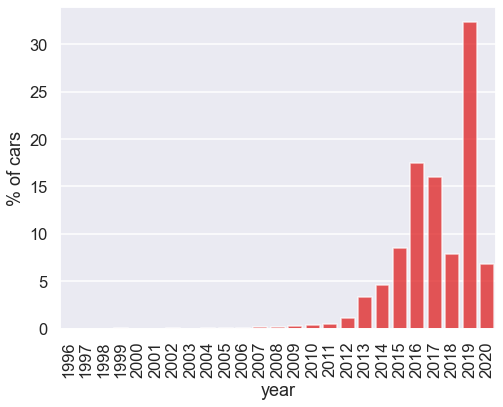

In [223]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='year', y='% of cars', data=year, color='red', alpha=0.75)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [224]:
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

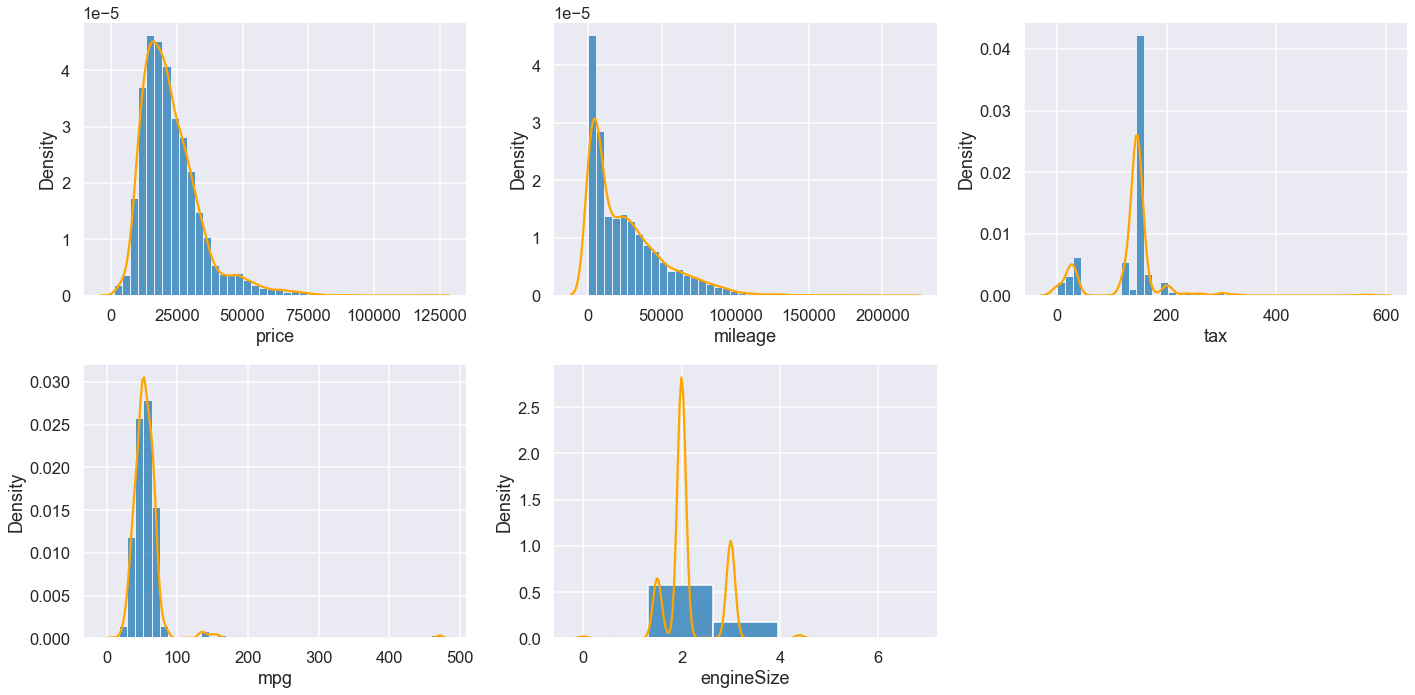

In [250]:
plt.figure(figsize=(20,10))
    
plt.subplot(2,3,1)
sns.histplot(x='price', data=df, bins=40, stat="density")
sns.kdeplot(x='price', data=df, color='orange')

plt.subplot(2,3,2)
sns.histplot(x='mileage', data=df, bins=40, stat="density")
sns.kdeplot(x='mileage', data=df, color='orange')

plt.subplot(2,3,3)
sns.histplot(x='tax', data=df, bins=40, stat="density")
sns.kdeplot(x='tax', data=df, color='orange')

plt.subplot(2,3,4)
sns.histplot(x='mpg', data=df, bins=40, stat="density")
sns.kdeplot(x='mpg', data=df, color='orange')

plt.subplot(2,3,5)
sns.histplot(x='engineSize', data=df, bins=5, stat="density")
sns.kdeplot(x='engineSize', data=df, color='orange')

plt.tight_layout()
plt.show()